In [12]:
import re
import math
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt
import numpy as np

from numpy import random as rand

In [13]:
def dms2dec(degrees, minutes, seconds):
    decimal = (degrees + (minutes * 1/60) + (seconds * 1/60 * 1/60))
    return decimal

In [14]:
def calcArea(cornerOne, cornerTwo):
    cornerOneLong = dms2dec(cornerOne[0][0], cornerOne[0][1], cornerOne[0][2])
    cornerOneLat = dms2dec(cornerOne[1][0], cornerOne[1][1], cornerOne[1][2])
    cornerTwoLong = dms2dec(cornerTwo[0][0], cornerTwo[0][1], cornerTwo[0][2])
    cornerTwoLat = dms2dec(cornerTwo[1][0], cornerTwo[1][1], cornerTwo[1][2])

    height = abs(cornerOneLat - cornerTwoLat) * 111320 #constant for one degree of lat
    width = abs(cornerOneLong - cornerTwoLong) * (40075000 * math.cos(cornerTwoLat) /360)

    areaMeters = abs(height * width)
    areaHectares = areaMeters/10000

    return areaMeters, areaHectares


In [15]:
cornerOne = [[80,10,14.5], [41, 14, 33.5]]
cornerTwo = [[80,11,9.8], [41,15,2.1]]

areaMeters, areaHectares = calcArea(cornerOne, cornerTwo)
print(areaMeters)
print(areaHectares)

1387010.7005357768
138.70107005357767


Question 2


pdot(t) = v(t)

vdot(t) = a(t)

u(t) = a(t) + b(t) (bias) + sig(t) (noise)

dt = 0.01

use xhat(t) = x(t=k)

P(t) = p(t = k)

xhatdot = A xhat

b(t) = b(t-1) + rand.normal(0, 1 * 0.000001) * dt
sig(t) = sig(t-1) + rand.normal( 2.5 * 0.001) * dt

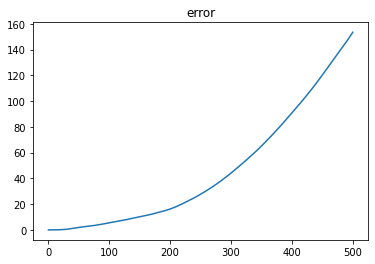

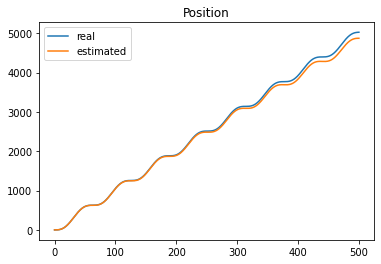

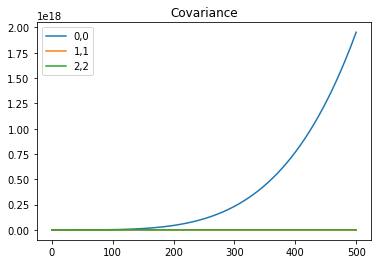

In [147]:
dt=0.01
tf=500/dt
t=0
o2b = 1 * (10 ** -6)
o2s = 2.5 * (10 ** -3)

A = np.array([[0,1,0],[0,0,1],[0,0,0]])
B = np.array([[0,0],[1,0],[0,1]])
u = np.array([[math.sin(0.001)],[0]])
unbiased_u = np.array([[math.sin(0.001)],[0]])

P = np.eye(3)
Q = np.eye(3)
Q = Q * o2s
#pvb
xhat = np.array([[0,0,0]]).T
x = np.array([[0,0,0]]).T

errorR = np.zeros(int(tf))


X_HAT_STORE= np.zeros((int(tf)))
X_STORE= np.zeros((int(tf)))
T_REC = np.zeros(int(tf))
P_STORE= np.zeros((3,int(tf)))

U = []

for i in range(0,int(tf)):
    t = t + dt

    a = math.sin(0.001*i)
    wb = rand.normal(0,math.sqrt(o2b))
    bias = xhat[2]
    noise = rand.normal(0,math.sqrt(o2s))
    u_tilde = a + bias + noise
    U.append(u_tilde)

    u[0] = u_tilde
    u[1] = wb
    unbiased_u[0,0] = a

    xhat = xhat + (A@xhat + B @ u) * dt
    x = x + (A@x + B @ unbiased_u) * dt
    
    P += A @ P + P@A.T + Q * dt

    error = x[0,0] - xhat[0,0]

    P_diag = np.diag(P)

    X_HAT_STORE[i] = xhat[0,0]
    X_STORE[i] = x[0,0]
    T_REC[i] = t
    P_STORE[0,i] = P_diag[0]
    P_STORE[1,i] = P_diag[1]
    P_STORE[2,i] = P_diag[2]
    errorR[i] = abs(error)

plt.close('all')


plt.figure(1)
plt.plot(T_REC, errorR)
plt.title('error')

plt.figure(2)
plt.plot(T_REC,X_STORE, label = "real")
plt.plot(T_REC,X_HAT_STORE, label = "estimated")
plt.title('Position')
plt.legend()

plt.figure(3)
plt.plot(T_REC,P_STORE[0], label = "0,0")
plt.plot(T_REC,P_STORE[1], label = "1,1")
plt.plot(T_REC,P_STORE[2], label = "2,2")
plt.title('Covariance')
plt.legend()

plt.show()
   

# Question 3

1) 
    Kalman Filter = P_tilde@C.T@np.linalg.inv(C@P_tilde@C.T+R)

    Transition Matrix = [1,0,0]
    
    Measurement matrix = []

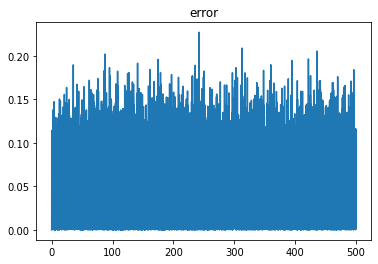

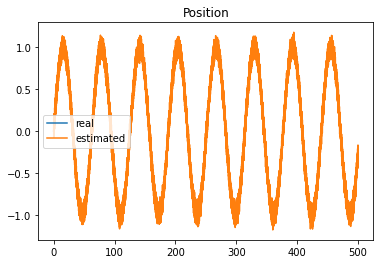

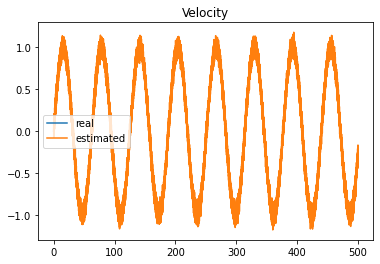

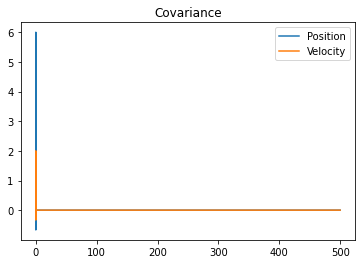

In [167]:
dt=0.01
tf=500/dt
t=0
o2b = 1 * (10 ** -6)
o2s = 2.5 * (10 ** -3)
o2p = 3

A = np.array([[0,1,0],[0,0,1],[0,0,0]])
B = np.array([[0,0],[1,0],[0,1]])
u = np.array([[math.sin(0.001)],[0]])
unbiased_u = np.array([[math.sin(0.001)],[0]])

C = np.array([[1,0,0]])
P = np.eye(3)
Q = np.eye(3)
Q = Q * o2s
#pvb
xhat = np.array([[0,0,0]]).T
x = np.array([[0,0,0]]).T

y = []
y.append((C@xhat)[0,0])

errorR = np.zeros(int(tf))


X_HAT_STORE= np.zeros((int(tf)))
V_HAT_STORE= np.zeros((int(tf)))
V_STORE= np.zeros((int(tf)))
X_STORE= np.zeros((int(tf)))
T_REC = np.zeros(int(tf))
P_STORE= np.zeros((3,int(tf)))

U = []
for i in range(1,int(tf)):
    t = t + dt

    a = math.sin(0.001*i)
    wb = rand.normal(0,math.sqrt(o2b))
    bias = xhat[2]
    noise = rand.normal(0,math.sqrt(o2s))
    u_tilde = a + bias + noise
    U.append(u_tilde)

    u[0] = u_tilde
    u[1] = wb
    unbiased_u[0] = a

    x = (A@x + B @ unbiased_u)
    y.append((C@x+rand.normal(0,math.sqrt(o2p)))[0,0]) 

    x_tilde = (A@xhat + B @ u)
    y_tilde = C@x_tilde

    P_tilde = A@P + P@A.T+dt*Q

    K = P_tilde@C.T@np.linalg.inv(C@P_tilde@C.T+R)

    # xhat = x_tilde+K*(y[i-1] - y_tilde)
    # P = (np.eye(3)-K@C)@P_tilde

    if ((i - 1)%100 == 0) :
        xhat = x_tilde + K@(y[i-1] - y_tilde)
        P = (np.eye(3)-K@C)@P_tilde
    else :
        xhat = x_tilde
        P = P_tilde
    

    error = x[0,0] - xhat[0,0]

    P_diag = np.diag(P)

    X_HAT_STORE[i] = xhat[0,0]
    V_HAT_STORE[i] = xhat[1,0]
    X_STORE[i] = x[0,0]
    V_STORE[i] = x[1,0]
    T_REC[i] = t
    P_STORE[0,i] = P_diag[0]
    P_STORE[1,i] = P_diag[1]
    P_STORE[2,i] = P_diag[2]
    errorR[i] = abs(error)

plt.close('all')


plt.figure(1)
plt.plot(T_REC, errorR)
plt.title('error')

plt.figure(2)
plt.plot(T_REC,X_STORE, label = "real")
plt.plot(T_REC,X_HAT_STORE, label = "estimated")
plt.title('Position')
plt.legend()

plt.figure(3)
plt.plot(T_REC,V_STORE, label = "real")
plt.plot(T_REC,V_HAT_STORE, label = "estimated")
plt.title('Velocity')
plt.legend()

plt.figure(4)
plt.plot(T_REC,P_STORE[0], label = "Position")
plt.plot(T_REC,P_STORE[1], label = "Velocity")
plt.title('Covariance')
plt.legend()

plt.show()

I cant figure out what's wrong


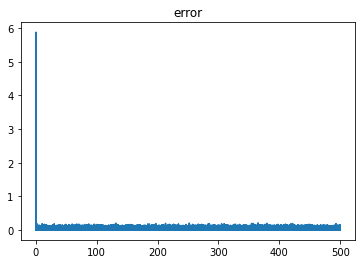

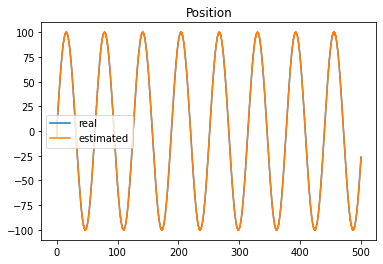

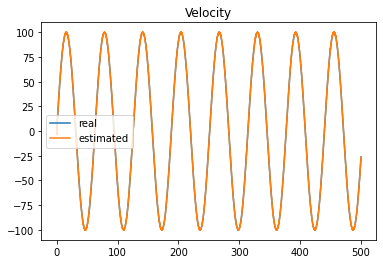

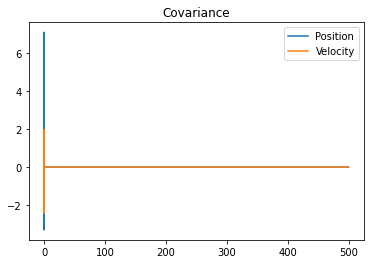

In [172]:
dt=0.01
tf=500/dt
t=0
o2b = 1 * (10 ** -6)
o2s = 2.5 * (10 ** -3)
o2p = 3

A = np.array([[0,1,0],[0,0,1],[0,0,0]])
B = np.array([[0,0],[1,0],[0,1]])
u = np.array([[math.sin(0.001)],[0]])
unbiased_u = np.array([[math.sin(0.001)],[0]])

C = np.array([[1,0,0]])
P = np.eye(3)
Q = np.eye(3)
Q = Q * o2s
#pvb
xhat = np.array([[0,0,0]]).T
x = np.array([[0,0,0]]).T

y = []
y.append((C@xhat)[0,0])

errorR = np.zeros(int(tf))


X_HAT_STORE= np.zeros((int(tf)))
V_HAT_STORE= np.zeros((int(tf)))
V_STORE= np.zeros((int(tf)))
X_STORE= np.zeros((int(tf)))
T_REC = np.zeros(int(tf))
P_STORE= np.zeros((3,int(tf)))

U = []
for i in range(1,int(tf)):
    t = t + dt

    a = math.sin(0.001*i) * 100
    wb = rand.normal(0,math.sqrt(o2b))
    bias = xhat[2]
    noise = rand.normal(0,math.sqrt(o2s))
    u_tilde = a + bias + noise
    U.append(u_tilde)

    u[0] = u_tilde
    u[1] = wb
    unbiased_u[0] = a

    x = (A@x + B @ unbiased_u)
    y.append((C@x+rand.normal(0,math.sqrt(o2p)))[0,0]) 

    x_tilde = (A@xhat + B @ u)
    y_tilde = C@x_tilde

    P_tilde = A@P + P@A.T+dt*Q

    K = P_tilde@C.T@np.linalg.inv(C@P_tilde@C.T+R)

    xhat = x_tilde+K*(y[i-1] - y_tilde)
    P = (np.eye(3)-K@C)@P_tilde
    

    error = x[0,0] - xhat[0,0]

    P_diag = np.diag(P)

    X_HAT_STORE[i] = xhat[0,0]
    V_HAT_STORE[i] = xhat[1,0]
    X_STORE[i] = x[0,0]
    V_STORE[i] = x[1,0]
    T_REC[i] = t
    P_STORE[0,i] = P_diag[0]
    P_STORE[1,i] = P_diag[1]
    P_STORE[2,i] = P_diag[2]
    errorR[i] = abs(error)

plt.close('all')


plt.figure(1)
plt.plot(T_REC, errorR)
plt.title('error')

plt.figure(2)
plt.plot(T_REC,X_STORE, label = "real")
plt.plot(T_REC,X_HAT_STORE, label = "estimated")
plt.title('Position')
plt.legend()

plt.figure(3)
plt.plot(T_REC,V_STORE, label = "real")
plt.plot(T_REC,V_HAT_STORE, label = "estimated")
plt.title('Velocity')
plt.legend()

plt.figure(4)
plt.plot(T_REC,P_STORE[0], label = "Position")
plt.plot(T_REC,P_STORE[1], label = "Velocity")
plt.title('Covariance')
plt.legend()

plt.show()

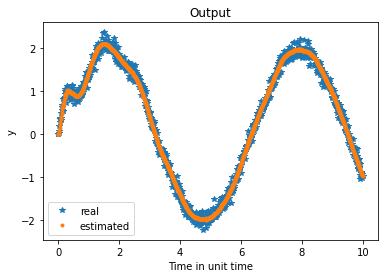

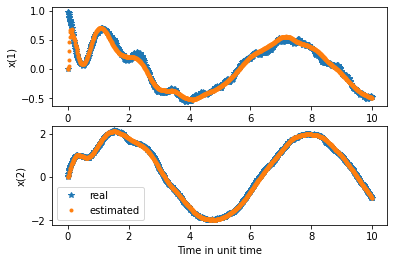

In [105]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import numpy as np
from scipy.linalg import expm
import math
import matplotlib.pyplot as plt



A=np.array([[-1, -5], [6,-1]]) 
B=np.array([[1, 0]]).T

x=np.array([[1,0]]).T 
u=0
C=np.array([[0, 1]])

y=[] 
y.append((C@x)[0,0]) 

#integration parameters
dt=0.01
tf=10/dt
t=0

Ad=expm(A*dt)


w=0.01 
v=0.1 
x_tilde=np.array([[0,0]]).T 
               
x_hat=x_tilde 

Q=np.eye(2,2)*w 
R= v 

P=np.eye(2,2)*1



#storage variables
X_HAT_STORE= np.zeros((2,int(tf)))
X_STORE= np.zeros((2,int(tf)))
T_REC = np.zeros(int(tf))
Y = np.zeros(int(tf))


# main loop
U=[]
for k in range (1,int(tf)):
    
    #system intergration
    u=math.sin(0.01*k)*0.1 
    U.append(u)
    
    x=Ad@x+B*u+np.random.randn(2,1)*w 
    y.append((C@x+np.random.randn(1)*v)[0,0])

    t=t+dt
    
    x_tilde=Ad@x_hat+B*u
    y_tilde=C@x_tilde
    

    P_tilde=Ad@P@Ad.transpose()+dt*Q

    K=P_tilde@C.T@np.linalg.inv(C@P_tilde@C.T+R) 

    
    x_hat=x_tilde+K*(y[k-1]-y_tilde) 


    P=(np.eye(2,2)-K@C)@P_tilde 
    
    
    X_HAT_STORE[0,k-1] = x_hat[0,0]
    X_HAT_STORE[1,k-1] = x_hat[1,0]
    X_STORE[0,k-1] = x[0,0]
    X_STORE[1,k-1] = x[1,0]
    T_REC[k-1] = t
    Y[k-1]=y[k-1]
#end for    
plt.close('all')
plt.figure(1)
plt.plot(T_REC,Y,'*', T_REC, X_HAT_STORE[1,:],'.')
plt.legend(['real', 'estimated'])
plt.title('Output')
plt.xlabel('Time in unit time')
plt.ylabel('y')

fig, axs = plt.subplots(2)
axs[0].plot(T_REC,X_STORE[0,:],'*', T_REC, X_HAT_STORE[0,:],'.')
axs[0].set(ylabel = "x(1)")
axs[1].plot(T_REC,X_STORE[1,:],'*', T_REC, X_HAT_STORE[1,:],'.')
plt.xlabel('Time in unit time')
axs[1].set(ylabel = "x(2)")
axs[1].legend(['real', 'estimated'])